# Import Libralies

In [15]:
# Data Manipulation
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# K-mean Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## Read the data file

In [5]:
def read_datafile(filepath):
    """reads the data file and pastes into a data frame."""
    df = pd.read_csv(filepath)
    return df

filepath = 'Wholesale customers data.csv'
df = read_datafile(filepath)

df.sample(7)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
132,1,3,14903,2032,2479,576,955,328
405,1,3,6884,1046,1167,2069,593,378
341,2,3,2320,5763,11238,767,5162,2158
193,2,3,180,3485,20292,959,5618,666
235,1,1,1838,6380,2824,1218,1216,295
127,2,3,21465,7243,10685,880,2386,2749
52,2,3,40721,3916,5876,532,2587,1278


## Get overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.shape

(440, 8)

In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Data Exploratory Analysis

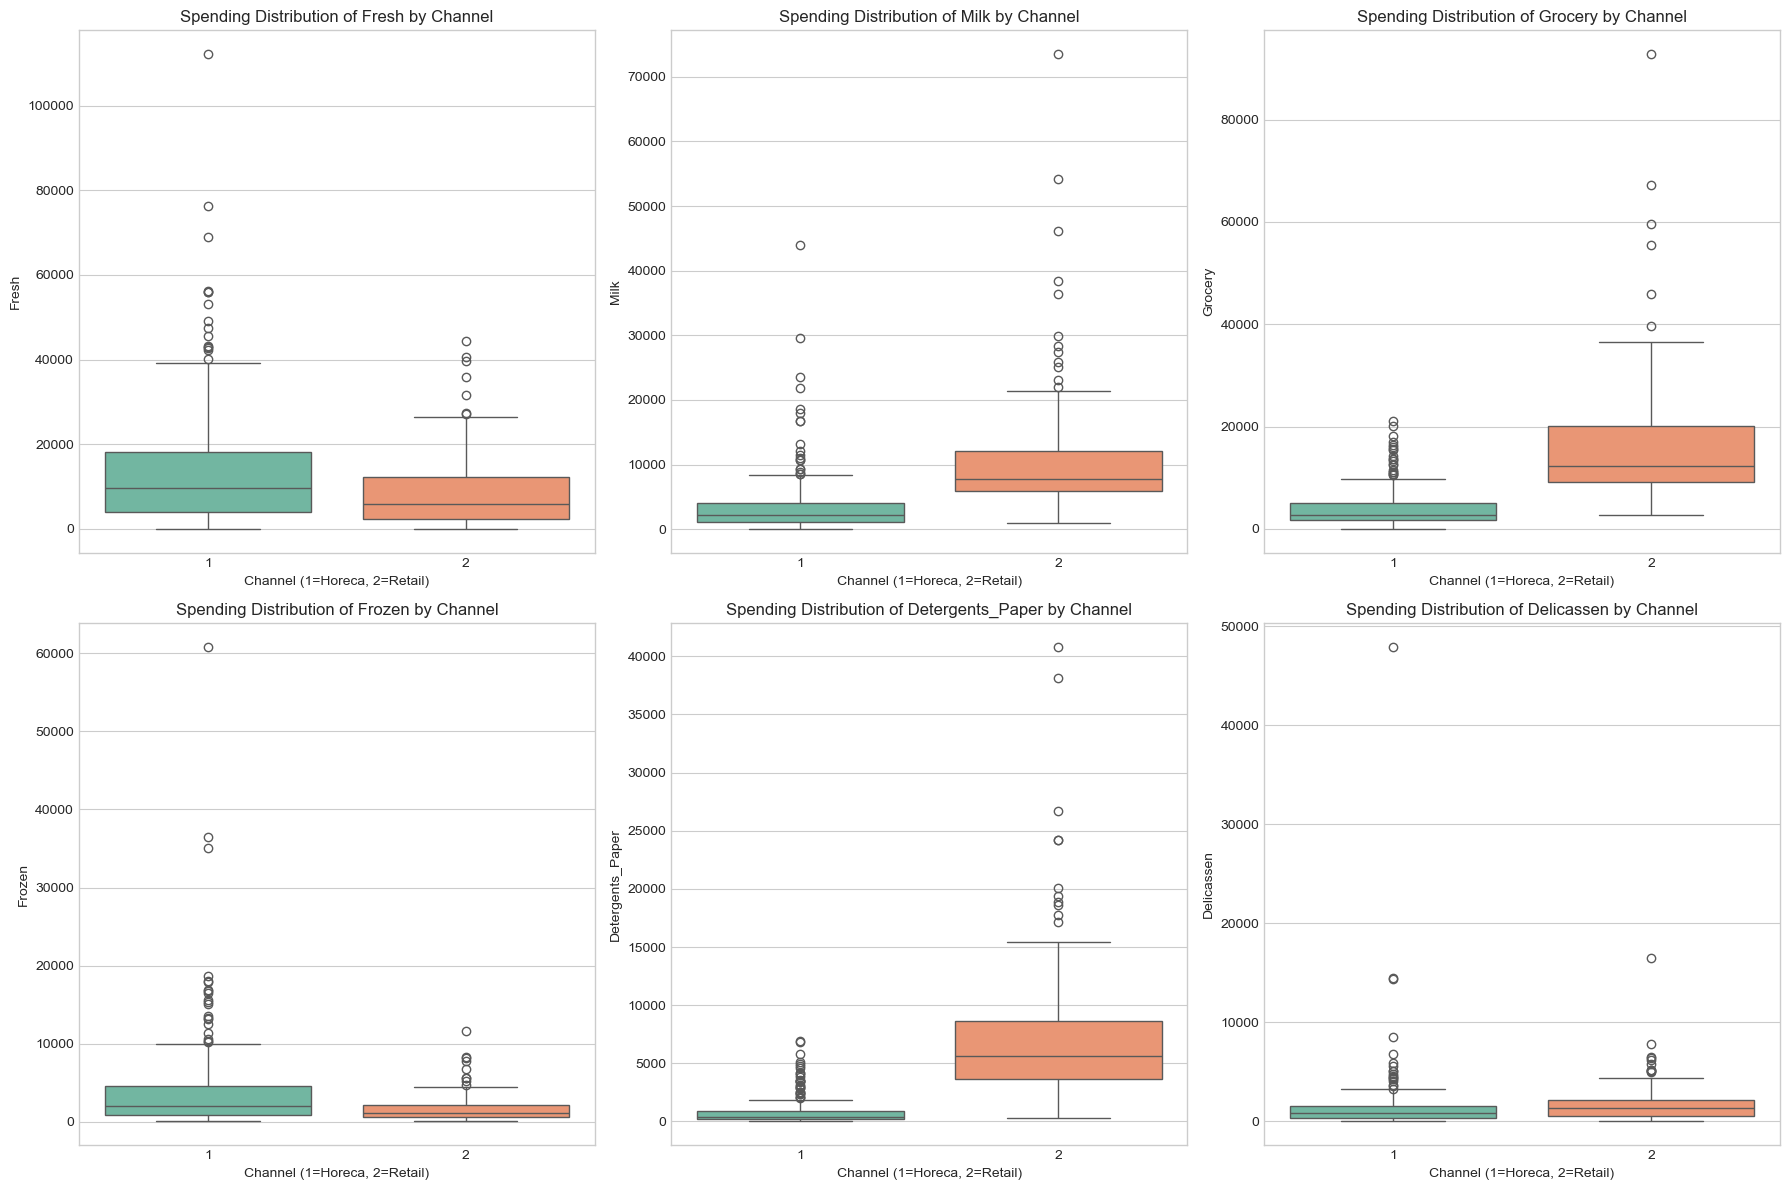

In [16]:
# Create a list of the 6 spending features
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a figure with a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
plt.style.use('seaborn-v0_8-whitegrid')

# Flatten the axes array for easy iteration (0,0, 0,1, 0,2, 1,0, 1,1, 1,2)
axes = axes.flatten()

# Loop through each spending feature and plot its distribution by Channel
for i, feature in enumerate(spending_features):
    # The corrected line (assigning hue=x and setting legend=False):
    sns.boxplot(x='Channel', y=feature, data=df, ax=axes[i], palette='Set2', hue='Channel', legend=False)
    axes[i].set_title(f'Spending Distribution of {feature} by Channel')
    axes[i].set_xlabel('Channel (1=Horeca, 2=Retail)')

plt.tight_layout()
plt.show()